In [1]:
#Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Reading csv files
session_data = pd.read_csv("D:\\Spotify-Prediction\\Datasets\\Training_Set\\log_mini.csv")
tf0 = pd.read_csv("D:\\Spotify-Prediction\\Datasets\\track_features\\tf_000000000001.csv")
tf1 = pd.read_csv("D:\\Spotify-Prediction\\Datasets\\track_features\\tf_000000000000.csv")
pd.set_option("display.max_columns", None)

In [3]:
session_data

,session_id,session_position,session_length,track_id_clean,skip_1,skip_2,skip_3,not_skipped,context_switch,no_pause_before_play,short_pause_before_play,long_pause_before_play,hist_user_behavior_n_seekfwd,hist_user_behavior_n_seekback,hist_user_behavior_is_shuffle,hour_of_day,date,premium,context_type,hist_user_behavior_reason_start,hist_user_behavior_reason_end
0,0_00006f66-33e5-4de7-a324-2d18e439fc1e,1,20,t_0479f24c-27d2-46d6-a00c-7ec928f2b539,False,False,False,True,0,0,0,0,0,0,True,16,2018-07-15,True,editorial_playlist,trackdone,trackdone
1,0_00006f66-33e5-4de7-a324-2d18e439fc1e,2,20,t_9099cd7b-c238-47b7-9381-f23f2c1d1043,False,False,False,True,0,1,0,0,0,0,True,16,2018-07-15,True,editorial_playlist,trackdone,trackdone
2,0_00006f66-33e5-4de7-a324-2d18e439fc1e,3,20,t_fc5df5ba-5396-49a7-8b29-35d0d28249e0,False,False,False,True,0,1,0,0,0,0,True,16,2018-07-15,True,editorial_playlist,trackdone,trackdone
3,0_00006f66-33e5-4de7-a324-2d18e439fc1e,4,20,t_23cff8d6-d874-4b20-83dc-94e450e8aa20,False,False,False,True,0,1,0,0,0,0,True,16,2018-07-15,True,editorial_playlist,trackdone,trackdone
4,0_00006f66-33e5-4de7-a324-2d18e439fc1e,5,20,t_64f3743c-f624-46bb-a579-0f3f9a07a123,False,False,False,True,0,1,0,0,0,0,True,16,2018-07-15,True,editorial_playlist,trackdone,trackdone
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167875,0_0eaeef5d-25e9-4429-bd55-af15d3604c9f,16,20,t_360910e8-2a84-42b0-baf1-59abcf96a1f2,False,False,False,True,0,1,0,0,0,0,False,13,2018-07-15,True,user_collection,trackdone,trackdone
167876,0_0eaeef5d-25e9-4429-bd55-af15d3604c9f,17,20,t_aa2fff77-9b0a-4fa3-a685-ecef50310e8a,False,False,False,True,0,1,0,0,0,0,False,13,2018-07-15,True,user_collection,trackdone,trackdone
167877,0_0eaeef5d-25e9-4429-bd55-af15d3604c9f,18,20,t_f673e1b7-4ebe-4fc1-ac24-a9f25de70381,False,False,False,True,0,1,0,0,0,0,False,13,2018-07-15,True,user_collection,trackdone,trackdone
167878,0_0eaeef5d-25e9-4429-bd55-af15d3604c9f,19,20,t_e172e8e7-7161-42a9-acb0-d606346c8f87,False,False,False,True,0,1,0,0,0,0,False,13,2018-07-15,True,user_collection,trackdone,trackdone


In [4]:
tf0

,track_id,duration,release_year,us_popularity_estimate,acousticness,beat_strength,bounciness,danceability,dyn_range_mean,energy,flatness,instrumentalness,key,liveness,loudness,mechanism,mode,organism,speechiness,tempo,time_signature,valence,acoustic_vector_0,acoustic_vector_1,acoustic_vector_2,acoustic_vector_3,acoustic_vector_4,acoustic_vector_5,acoustic_vector_6,acoustic_vector_7
0,t_8e88a9ea-1451-44ff-8fae-8bbad75b55c8,364.906677,1979,90.965232,0.851046,0.363622,0.300117,0.465182,5.150449,0.127037,1.054217,2.748115e-07,0,0.096354,-18.855,0.406516,major,0.733656,0.031645,132.020996,4,0.211844,0.042945,-0.433785,0.115645,0.456437,0.400481,-0.259629,-0.002503,-0.757088
1,t_65d18266-940a-4f27-9df5-fc9fee10b406,106.160004,1987,96.794376,0.250302,0.440026,0.414878,0.563041,6.605741,0.529062,0.962033,3.822885e-06,0,0.047301,-14.182,0.397906,major,0.461069,0.048545,126.434998,4,0.736954,-0.069781,-0.360500,0.170185,0.475511,0.501377,-0.199189,0.063746,-0.648822
2,t_59ef344c-10bc-415e-8a80-f97b46ee8bc8,275.906677,1985,98.495282,0.376435,0.659612,0.650850,0.696868,9.034748,0.378950,1.028740,1.942323e-03,0,0.112578,-13.783,0.376093,major,0.515249,0.027752,87.459999,4,0.703813,0.137408,-0.325600,0.162500,0.209357,0.556263,-0.047349,-0.201937,-0.722556
3,t_ba702bde-7de3-418f-95f6-5c1af618e28c,314.626678,1960,92.442730,0.710315,0.553800,0.617168,0.601151,9.409214,0.413531,1.009348,5.948958e-01,0,0.254762,-13.531,0.195933,major,0.758640,0.066143,118.060997,4,0.723693,0.461877,-1.031251,0.133070,0.653448,0.139172,-0.265598,-0.257693,-0.093790
4,t_96e1843d-312b-476d-9e31-ebb14bc478ff,323.133331,1990,96.715096,0.001014,0.318370,0.283095,0.331088,5.358051,0.759440,0.927291,7.619123e-04,0,0.082879,-11.208,0.422735,major,0.408188,0.057926,126.890999,4,0.418748,0.280588,0.362112,-0.345611,-0.461005,0.587766,0.128220,-0.172042,0.341655
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1853072,t_8ca1c0cb-7140-482d-a51e-20c2d04dd826,269.857971,2018,93.343527,0.416430,0.663950,0.705080,0.706001,10.299231,0.896618,0.973451,4.603480e-06,11,0.279414,-5.470,0.524096,minor,0.447157,0.166798,89.954002,4,0.815603,-0.597758,0.083731,0.311215,0.529423,-0.009239,0.200206,0.462133,0.061174
1853073,t_0190990f-99f3-41a8-830f-6d1f09ea603d,398.811432,2018,95.032938,0.343518,0.478404,0.538458,0.598111,8.505329,0.548735,1.018861,6.431659e-08,11,0.105213,-6.971,0.267416,minor,0.572138,0.138183,89.882004,4,0.161593,-0.772470,0.375431,0.216060,0.268388,0.089650,-0.057491,0.128478,0.211413
1853074,t_9cf9f46e-2efd-4355-af00-2dfdcaf5b2a0,233.919464,2018,93.573216,0.226675,0.580901,0.575887,0.717730,8.285830,0.590269,1.015117,4.701747e-08,11,0.144501,-7.321,0.705167,minor,0.262971,0.119490,96.012001,4,0.556708,-0.592553,0.303270,0.438105,0.205160,-0.160759,0.130312,0.274968,-0.035709
1853075,t_7eed5c40-e59e-42b1-abff-81415c8c80f7,153.484344,2018,94.099667,0.775190,0.482286,0.465619,0.595120,7.134738,0.473999,1.039162,9.204716e-01,11,0.118524,-9.451,0.839181,minor,0.559814,0.028052,159.990997,4,0.354665,0.207883,-0.127923,-0.256583,-0.304789,0.068105,0.116602,-0.273483,0.104337


In [5]:
tf1

,track_id,duration,release_year,us_popularity_estimate,acousticness,beat_strength,bounciness,danceability,dyn_range_mean,energy,flatness,instrumentalness,key,liveness,loudness,mechanism,mode,organism,speechiness,tempo,time_signature,valence,acoustic_vector_0,acoustic_vector_1,acoustic_vector_2,acoustic_vector_3,acoustic_vector_4,acoustic_vector_5,acoustic_vector_6,acoustic_vector_7
0,t_2e8f4b71-8a0b-4b9c-b7d8-fb5208e87f9f,326.013336,1971,99.582885,0.716209,0.366495,0.332605,0.439835,5.805774,0.238847,1.010700,6.533861e-01,0,0.769258,-17.094,0.199170,major,0.759699,0.033940,100.370003,4,0.223395,0.146012,-0.706908,0.259496,0.481157,0.238427,-0.098389,-0.254960,-0.227383
1,t_dae2ec0e-ec7b-4b3e-b60c-4a884d0eccb0,147.813324,1963,97.272035,0.839460,0.362212,0.389829,0.507580,6.845427,0.420476,1.000398,3.941550e-09,0,0.085844,-11.295,0.357639,major,0.747436,0.049856,141.334000,4,0.484702,0.039554,-0.539554,0.105141,0.692589,0.226047,-0.468162,0.164389,-0.769024
2,t_cf0164dd-1531-4399-bfa6-dec19cd1fedc,110.400002,1974,99.620384,0.054673,0.495002,0.589378,0.552311,9.361949,0.842938,0.957766,1.041595e-01,0,0.407325,-9.310,0.304721,major,0.493154,0.071753,138.889999,4,0.818441,0.083863,-0.242108,-0.014258,0.096396,0.417641,-0.050576,-0.204757,-0.172563
3,t_0f90acc7-d5c5-4e53-901d-55610fbd090c,237.653336,1988,96.796830,0.042606,0.389634,0.359044,0.585673,6.068578,0.665398,0.947322,1.444963e-05,0,0.251502,-12.159,0.702948,major,0.212197,0.029425,133.139008,4,0.594829,0.192498,0.340039,0.034846,-0.389794,0.518381,0.185008,-0.079907,-0.016978
4,t_36b9ad02-095a-443d-a697-6c7285d9410a,174.600006,1987,97.905891,0.249982,0.513640,0.485435,0.635095,7.198735,0.408715,1.014063,5.266880e-01,0,0.218370,-13.813,0.888889,major,0.193438,0.032178,152.212006,4,0.591289,0.270586,-0.411061,0.165898,0.225652,0.335518,-0.036643,-0.016300,-0.446870
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1853306,t_6a2bbc56-4d97-4c79-8f36-662499eac230,186.894104,2018,94.503844,0.005289,0.466386,0.446391,0.359531,6.931908,0.602030,1.022817,2.929182e-01,11,0.121873,-9.070,0.388679,minor,0.432285,0.100813,85.045998,4,0.496875,-0.626732,0.225907,0.153023,0.063408,-0.366663,-0.011826,-0.289035,0.256306
1853307,t_43db7bac-fc37-4327-aac5-501acd14fd74,181.083450,2018,97.899482,0.977857,0.343667,0.487318,0.489066,8.556108,0.047977,1.052769,8.279825e-01,11,0.088178,-26.788,0.120521,minor,0.929970,0.035583,103.420998,3,0.146332,0.537184,-0.865088,0.166772,0.416739,-0.087424,-0.111563,-0.208069,0.026608
1853308,t_098559b2-9973-444a-808a-ec51be32e887,171.340225,2018,97.069653,0.886540,0.723117,0.729560,0.810203,10.188384,0.171741,1.052141,6.835452e-08,11,0.085586,-13.604,0.680672,minor,0.666305,0.033064,97.085999,4,0.706847,0.051021,0.213240,0.325312,-0.206482,-0.020798,0.197388,0.113930,-0.390708
1853309,t_e25ff72d-e062-43cb-a112-00d3b570a0c9,92.478050,2018,98.238789,0.863838,0.498752,0.568723,0.593559,8.913641,0.583878,0.952237,2.595907e-11,11,0.901156,-10.150,0.239316,minor,0.813897,0.404647,90.528000,4,0.642308,-0.320482,-0.231003,-0.126747,0.350136,-0.078666,-0.297330,-0.336992,-0.115108


In [6]:
track_data = tf0.append(tf1,ignore_index = True)

In [7]:
track_data

,track_id,duration,release_year,us_popularity_estimate,acousticness,beat_strength,bounciness,danceability,dyn_range_mean,energy,flatness,instrumentalness,key,liveness,loudness,mechanism,mode,organism,speechiness,tempo,time_signature,valence,acoustic_vector_0,acoustic_vector_1,acoustic_vector_2,acoustic_vector_3,acoustic_vector_4,acoustic_vector_5,acoustic_vector_6,acoustic_vector_7
0,t_8e88a9ea-1451-44ff-8fae-8bbad75b55c8,364.906677,1979,90.965232,0.851046,0.363622,0.300117,0.465182,5.150449,0.127037,1.054217,2.748115e-07,0,0.096354,-18.855,0.406516,major,0.733656,0.031645,132.020996,4,0.211844,0.042945,-0.433785,0.115645,0.456437,0.400481,-0.259629,-0.002503,-0.757088
1,t_65d18266-940a-4f27-9df5-fc9fee10b406,106.160004,1987,96.794376,0.250302,0.440026,0.414878,0.563041,6.605741,0.529062,0.962033,3.822885e-06,0,0.047301,-14.182,0.397906,major,0.461069,0.048545,126.434998,4,0.736954,-0.069781,-0.360500,0.170185,0.475511,0.501377,-0.199189,0.063746,-0.648822
2,t_59ef344c-10bc-415e-8a80-f97b46ee8bc8,275.906677,1985,98.495282,0.376435,0.659612,0.650850,0.696868,9.034748,0.378950,1.028740,1.942323e-03,0,0.112578,-13.783,0.376093,major,0.515249,0.027752,87.459999,4,0.703813,0.137408,-0.325600,0.162500,0.209357,0.556263,-0.047349,-0.201937,-0.722556
3,t_ba702bde-7de3-418f-95f6-5c1af618e28c,314.626678,1960,92.442730,0.710315,0.553800,0.617168,0.601151,9.409214,0.413531,1.009348,5.948958e-01,0,0.254762,-13.531,0.195933,major,0.758640,0.066143,118.060997,4,0.723693,0.461877,-1.031251,0.133070,0.653448,0.139172,-0.265598,-0.257693,-0.093790
4,t_96e1843d-312b-476d-9e31-ebb14bc478ff,323.133331,1990,96.715096,0.001014,0.318370,0.283095,0.331088,5.358051,0.759440,0.927291,7.619123e-04,0,0.082879,-11.208,0.422735,major,0.408188,0.057926,126.890999,4,0.418748,0.280588,0.362112,-0.345611,-0.461005,0.587766,0.128220,-0.172042,0.341655
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3706383,t_6a2bbc56-4d97-4c79-8f36-662499eac230,186.894104,2018,94.503844,0.005289,0.466386,0.446391,0.359531,6.931908,0.602030,1.022817,2.929182e-01,11,0.121873,-9.070,0.388679,minor,0.432285,0.100813,85.045998,4,0.496875,-0.626732,0.225907,0.153023,0.063408,-0.366663,-0.011826,-0.289035,0.256306
3706384,t_43db7bac-fc37-4327-aac5-501acd14fd74,181.083450,2018,97.899482,0.977857,0.343667,0.487318,0.489066,8.556108,0.047977,1.052769,8.279825e-01,11,0.088178,-26.788,0.120521,minor,0.929970,0.035583,103.420998,3,0.146332,0.537184,-0.865088,0.166772,0.416739,-0.087424,-0.111563,-0.208069,0.026608
3706385,t_098559b2-9973-444a-808a-ec51be32e887,171.340225,2018,97.069653,0.886540,0.723117,0.729560,0.810203,10.188384,0.171741,1.052141,6.835452e-08,11,0.085586,-13.604,0.680672,minor,0.666305,0.033064,97.085999,4,0.706847,0.051021,0.213240,0.325312,-0.206482,-0.020798,0.197388,0.113930,-0.390708
3706386,t_e25ff72d-e062-43cb-a112-00d3b570a0c9,92.478050,2018,98.238789,0.863838,0.498752,0.568723,0.593559,8.913641,0.583878,0.952237,2.595907e-11,11,0.901156,-10.150,0.239316,minor,0.813897,0.404647,90.528000,4,0.642308,-0.320482,-0.231003,-0.126747,0.350136,-0.078666,-0.297330,-0.336992,-0.115108


In [8]:
session_data.rename(columns = {'track_id_clean':'track_id'},inplace = True)

In [9]:
session_track_data = pd.merge(session_data,track_data, on = 'track_id',how = 'left')

In [10]:
session_track_data

,session_id,session_position,session_length,track_id,skip_1,skip_2,skip_3,not_skipped,context_switch,no_pause_before_play,short_pause_before_play,long_pause_before_play,hist_user_behavior_n_seekfwd,hist_user_behavior_n_seekback,hist_user_behavior_is_shuffle,hour_of_day,date,premium,context_type,hist_user_behavior_reason_start,hist_user_behavior_reason_end,duration,release_year,us_popularity_estimate,acousticness,beat_strength,bounciness,danceability,dyn_range_mean,energy,flatness,instrumentalness,key,liveness,loudness,mechanism,mode,organism,speechiness,tempo,time_signature,valence,acoustic_vector_0,acoustic_vector_1,acoustic_vector_2,acoustic_vector_3,acoustic_vector_4,acoustic_vector_5,acoustic_vector_6,acoustic_vector_7
0,0_00006f66-33e5-4de7-a324-2d18e439fc1e,1,20,t_0479f24c-27d2-46d6-a00c-7ec928f2b539,False,False,False,True,0,0,0,0,0,0,True,16,2018-07-15,True,editorial_playlist,trackdone,trackdone,180.066666,2018,99.968133,0.015848,0.438551,0.473455,0.653119,7.660024,0.553465,1.035007,3.484468e-03,1,0.678553,-6.577,0.546784,major,0.320668,0.069717,134.024994,4,0.152255,-0.815775,0.386409,0.230160,0.028028,-0.333373,0.015452,-0.353590,0.205826
1,0_00006f66-33e5-4de7-a324-2d18e439fc1e,2,20,t_9099cd7b-c238-47b7-9381-f23f2c1d1043,False,False,False,True,0,1,0,0,0,0,True,16,2018-07-15,True,editorial_playlist,trackdone,trackdone,236.796371,2018,99.896728,0.061811,0.654804,0.735661,0.877393,11.308750,0.726828,1.025636,1.031315e-07,7,0.104322,-5.319,0.824766,minor,0.131391,0.061158,130.037994,4,0.337152,-0.713646,0.363718,0.310315,-0.042222,-0.383164,0.066357,-0.365308,0.157920
2,0_00006f66-33e5-4de7-a324-2d18e439fc1e,3,20,t_fc5df5ba-5396-49a7-8b29-35d0d28249e0,False,False,False,True,0,1,0,0,0,0,True,16,2018-07-15,True,editorial_playlist,trackdone,trackdone,231.266663,2018,99.999976,0.354116,0.532155,0.540411,0.679719,8.065802,0.563009,1.029465,2.659035e-08,10,0.135776,-5.843,0.774327,major,0.296923,0.045354,145.028000,4,0.373862,-0.742541,0.375599,0.252660,-0.049007,-0.299745,0.063341,-0.486689,0.181604
3,0_00006f66-33e5-4de7-a324-2d18e439fc1e,4,20,t_23cff8d6-d874-4b20-83dc-94e450e8aa20,False,False,False,True,0,1,0,0,0,0,True,16,2018-07-15,True,editorial_playlist,trackdone,trackdone,169.826675,2018,99.995038,0.769225,0.641756,0.729224,0.864881,11.287586,0.529484,0.993520,6.598388e-06,1,0.103722,-7.756,0.630996,major,0.603271,0.229936,111.982002,4,0.649420,-0.705116,0.317562,0.289141,-0.038920,-0.393358,0.092719,-0.364418,0.285603
4,0_00006f66-33e5-4de7-a324-2d18e439fc1e,5,20,t_64f3743c-f624-46bb-a579-0f3f9a07a123,False,False,False,True,0,1,0,0,0,0,True,16,2018-07-15,True,editorial_playlist,trackdone,trackdone,210.545258,2018,99.998498,0.006602,0.732428,0.794881,0.857778,12.181586,0.650057,1.000571,2.066649e-06,8,0.120842,-4.919,0.759465,major,0.170148,0.240980,147.031006,4,0.652921,-0.868489,0.331280,0.210478,0.084740,-0.333287,-0.025706,-0.510350,0.182315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167875,0_0eaeef5d-25e9-4429-bd55-af15d3604c9f,16,20,t_360910e8-2a84-42b0-baf1-59abcf96a1f2,False,False,False,True,0,1,0,0,0,0,False,13,2018-07-15,True,user_collection,trackdone,trackdone,241.306671,2018,99.926393,0.100227,0.559790,0.571664,0.565336,8.411594,0.875369,0.981698,3.246980e-04,2,0.244097,-5.905,0.430147,minor,0.409132,0.045821,155.546005,4,0.891322,-0.530003,-0.020507,0.221878,0.232069,0.218059,0.086237,-0.181878,0.145040
167876,0_0eaeef5d-25e9-4429-bd55-af15d3604c9f,17,20,t_aa2fff77-9b0a-4fa3-a685-ecef50310e8a,False,False,False,True,0,1,0,0,0,0,False,13,2018-07-15,True,user_collection,trackdone,trackdone,212.533325,2018,99.905106,0.247189,0.601121,0.632665,0.703095,9.269985,0.529001,1.025182,6.178943e-08,1,0.322316,-7.339,0.438776,minor,0.433633,0.036520,134.427002,4,0.701824,-0.472023,-0.011628,0.234998,0.169529,0.321254,0.105851,-0.215453,-0.013233
167877,0_0eaeef

In [11]:
session_track_data.isnull().sum()

session_id                         0
session_position                   0
session_length                     0
track_id                           0
skip_1                             0
skip_2                             0
skip_3                             0
not_skipped                        0
context_switch                     0
no_pause_before_play               0
short_pause_before_play            0
long_pause_before_play             0
hist_user_behavior_n_seekfwd       0
hist_user_behavior_n_seekback      0
hist_user_behavior_is_shuffle      0
hour_of_day                        0
date                               0
premium                            0
context_type                       0
hist_user_behavior_reason_start    0
hist_user_behavior_reason_end      0
duration                           0
release_year                       0
us_popularity_estimate             0
acousticness                       0
beat_strength                      0
bounciness                         0
d

In [12]:
session_track_data['skip_1'].value_counts()

False    97118
True     70762
Name: skip_1, dtype: int64

In [13]:
session_track_data['skip_2'].value_counts()

True     86824
False    81056
Name: skip_2, dtype: int64

In [14]:
session_track_data['skip_3'].value_counts()

True     108850
False     59030
Name: skip_3, dtype: int64

In [15]:
#removing track_id column
session_track_data.drop('track_id',axis = 1, inplace = True)
session_track_data.set_index('session_id')

,session_position,session_length,skip_1,skip_2,skip_3,not_skipped,context_switch,no_pause_before_play,short_pause_before_play,long_pause_before_play,hist_user_behavior_n_seekfwd,hist_user_behavior_n_seekback,hist_user_behavior_is_shuffle,hour_of_day,date,premium,context_type,hist_user_behavior_reason_start,hist_user_behavior_reason_end,duration,release_year,us_popularity_estimate,acousticness,beat_strength,bounciness,danceability,dyn_range_mean,energy,flatness,instrumentalness,key,liveness,loudness,mechanism,mode,organism,speechiness,tempo,time_signature,valence,acoustic_vector_0,acoustic_vector_1,acoustic_vector_2,acoustic_vector_3,acoustic_vector_4,acoustic_vector_5,acoustic_vector_6,acoustic_vector_7
session_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0_00006f66-33e5-4de7-a324-2d18e439fc1e,1,20,False,False,False,True,0,0,0,0,0,0,True,16,2018-07-15,True,editorial_playlist,trackdone,trackdone,180.066666,2018,99.968133,0.015848,0.438551,0.473455,0.653119,7.660024,0.553465,1.035007,3.484468e-03,1,0.678553,-6.577,0.546784,major,0.320668,0.069717,134.024994,4,0.152255,-0.815775,0.386409,0.230160,0.028028,-0.333373,0.015452,-0.353590,0.205826
0_00006f66-33e5-4de7-a324-2d18e439fc1e,2,20,False,False,False,True,0,1,0,0,0,0,True,16,2018-07-15,True,editorial_playlist,trackdone,trackdone,236.796371,2018,99.896728,0.061811,0.654804,0.735661,0.877393,11.308750,0.726828,1.025636,1.031315e-07,7,0.104322,-5.319,0.824766,minor,0.131391,0.061158,130.037994,4,0.337152,-0.713646,0.363718,0.310315,-0.042222,-0.383164,0.066357,-0.365308,0.157920
0_00006f66-33e5-4de7-a324-2d18e439fc1e,3,20,False,False,False,True,0,1,0,0,0,0,True,16,2018-07-15,True,editorial_playlist,trackdone,trackdone,231.266663,2018,99.999976,0.354116,0.532155,0.540411,0.679719,8.065802,0.563009,1.029465,2.659035e-08,10,0.135776,-5.843,0.774327,major,0.296923,0.045354,145.028000,4,0.373862,-0.742541,0.375599,0.252660,-0.049007,-0.299745,0.063341,-0.486689,0.181604
0_00006f66-33e5-4de7-a324-2d18e439fc1e,4,20,False,False,False,True,0,1,0,0,0,0,True,16,2018-07-15,True,editorial_playlist,trackdone,trackdone,169.826675,2018,99.995038,0.769225,0.641756,0.729224,0.864881,11.287586,0.529484,0.993520,6.598388e-06,1,0.103722,-7.756,0.630996,major,0.603271,0.229936,111.982002,4,0.649420,-0.705116,0.317562,0.289141,-0.038920,-0.393358,0.092719,-0.364418,0.285603
0_00006f66-33e5-4de7-a324-2d18e439fc1e,5,20,False,False,False,True,0,1,0,0,0,0,True,16,2018-07-15,True,editorial_playlist,trackdone,trackdone,210.545258,2018,99.998498,0.006602,0.732428,0.794881,0.857778,12.181586,0.650057,1.000571,2.066649e-06,8,0.120842,-4.919,0.759465,major,0.170148,0.240980,147.031006,4,0.652921,-0.868489,0.331280,0.210478,0.084740,-0.333287,-0.025706,-0.510350,0.182315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0_0eaeef5d-25e9-4429-bd55-af15d3604c9f,16,20,False,False,False,True,0,1,0,0,0,0,False,13,2018-07-15,True,user_collection,trackdone,trackdone,241.306671,2018,99.926393,0.100227,0.559790,0.571664,0.565336,8.411594,0.875369,0.981698,3.246980e-04,2,0.244097,-5.905,0.430147,minor,0.409132,0.045821,155.546005,4,0.891322,-0.530003,-0.020507,0.221878,0.232069,0.218059,0.086237,-0.181878,0.145040
0_0eaeef5d-25e9-4429-bd55-af15d3604c9f,17,20,False,False,False,True,0,1,0,0,0,0,False,13,2018-07-15,True,user_collection,trackdone,trackdone,212.533325,2018,99.905106,0.247189,0.601121,0.632665,0.703095,9.269985,0.529001,1.025182,6.178943e-08,1,0.322316,-7.339,0.438776,minor,0.433633,0.036520,134.427002,4,0.701824,-0.472023,-0.011628,0.234998,0.169529,0.321254,0.105851,-0.215453,-0.013233
0_0eaeef5d-25e9-4429-bd55-af15d3604c9f,18,20,False,False,False,True,0,1,0,0,0,0,False,13,2018-07-15,True,user_collection,trackdone,trackdone,204.293335,2018,99.915604,0.298400,0.706898,0.730013,0.791413,10.419632,0.951893,0.940008,4.260943e-04,1,0.274913,-4.703,0.896789,major,0.22

# Exploratory Data Analysis

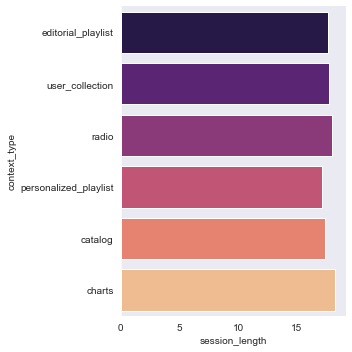

In [16]:
sns.set_style("dark")
sns.catplot(x = 'session_length',y = "context_type",data = session_track_data,kind = 'bar',ci = None,palette = 'magma')
plt.show()

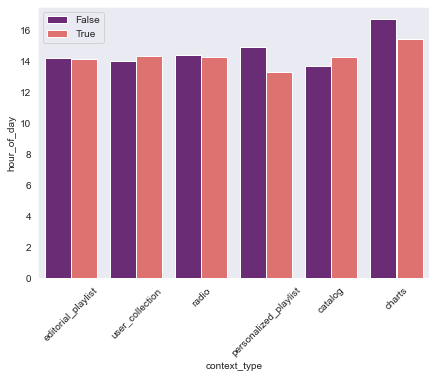

In [17]:
plt.figure(figsize = (7,5))
ax = sns.barplot(x = 'context_type',y = 'hour_of_day',data = session_track_data,ci = None, hue = 'premium',palette = 'magma')
plt.xticks(rotation = 45)
plt.legend(loc='upper left')
plt.show()

In [18]:
bins = [0,0.5,1.0]
labels = ['Low Confidence (0-0.5)','High Confidence (0.5-1.0)']
session_track_data['acoustic_confidence'] = pd.cut(session_track_data['acousticness'],bins,labels=labels)

In [19]:
bins = [0,0.5,1.0]
labels = ['Sad/Depressed/Angry tone (0-0.5)','Happy/Cheerful/Euphoric tone (0.5-1.0)']
session_track_data['Song_tone'] = pd.cut(session_track_data['valence'],bins,labels=labels)

In [20]:
bins = [0,0.5,1.0]
labels = ['Least Danceable (0-0.5)','Most Danceable (0.5-1.0)']
session_track_data['Danceable_Rating'] = pd.cut(session_track_data['danceability'],bins,labels=labels)

In [21]:
bins = [0,0.33,0.66,1.0]
labels = ['Only music (< 0.33)','Music and Speech (0.33-0.66)','Speech (> 0.66)']
session_track_data['Speechiness_Form'] = pd.cut(session_track_data['speechiness'],bins,labels=labels)

In [22]:
session_track_data

,session_id,session_position,session_length,skip_1,skip_2,skip_3,not_skipped,context_switch,no_pause_before_play,short_pause_before_play,long_pause_before_play,hist_user_behavior_n_seekfwd,hist_user_behavior_n_seekback,hist_user_behavior_is_shuffle,hour_of_day,date,premium,context_type,hist_user_behavior_reason_start,hist_user_behavior_reason_end,duration,release_year,us_popularity_estimate,acousticness,beat_strength,bounciness,danceability,dyn_range_mean,energy,flatness,instrumentalness,key,liveness,loudness,mechanism,mode,organism,speechiness,tempo,time_signature,valence,acoustic_vector_0,acoustic_vector_1,acoustic_vector_2,acoustic_vector_3,acoustic_vector_4,acoustic_vector_5,acoustic_vector_6,acoustic_vector_7,acoustic_confidence,Song_tone,Danceable_Rating,Speechiness_Form
0,0_00006f66-33e5-4de7-a324-2d18e439fc1e,1,20,False,False,False,True,0,0,0,0,0,0,True,16,2018-07-15,True,editorial_playlist,trackdone,trackdone,180.066666,2018,99.968133,0.015848,0.438551,0.473455,0.653119,7.660024,0.553465,1.035007,3.484468e-03,1,0.678553,-6.577,0.546784,major,0.320668,0.069717,134.024994,4,0.152255,-0.815775,0.386409,0.230160,0.028028,-0.333373,0.015452,-0.353590,0.205826,Low Confidence (0-0.5),Sad/Depressed/Angry tone (0-0.5),Most Danceable (0.5-1.0),Only music (< 0.33)
1,0_00006f66-33e5-4de7-a324-2d18e439fc1e,2,20,False,False,False,True,0,1,0,0,0,0,True,16,2018-07-15,True,editorial_playlist,trackdone,trackdone,236.796371,2018,99.896728,0.061811,0.654804,0.735661,0.877393,11.308750,0.726828,1.025636,1.031315e-07,7,0.104322,-5.319,0.824766,minor,0.131391,0.061158,130.037994,4,0.337152,-0.713646,0.363718,0.310315,-0.042222,-0.383164,0.066357,-0.365308,0.157920,Low Confidence (0-0.5),Sad/Depressed/Angry tone (0-0.5),Most Danceable (0.5-1.0),Only music (< 0.33)
2,0_00006f66-33e5-4de7-a324-2d18e439fc1e,3,20,False,False,False,True,0,1,0,0,0,0,True,16,2018-07-15,True,editorial_playlist,trackdone,trackdone,231.266663,2018,99.999976,0.354116,0.532155,0.540411,0.679719,8.065802,0.563009,1.029465,2.659035e-08,10,0.135776,-5.843,0.774327,major,0.296923,0.045354,145.028000,4,0.373862,-0.742541,0.375599,0.252660,-0.049007,-0.299745,0.063341,-0.486689,0.181604,Low Confidence (0-0.5),Sad/Depressed/Angry tone (0-0.5),Most Danceable (0.5-1.0),Only music (< 0.33)
3,0_00006f66-33e5-4de7-a324-2d18e439fc1e,4,20,False,False,False,True,0,1,0,0,0,0,True,16,2018-07-15,True,editorial_playlist,trackdone,trackdone,169.826675,2018,99.995038,0.769225,0.641756,0.729224,0.864881,11.287586,0.529484,0.993520,6.598388e-06,1,0.103722,-7.756,0.630996,major,0.603271,0.229936,111.982002,4,0.649420,-0.705116,0.317562,0.289141,-0.038920,-0.393358,0.092719,-0.364418,0.285603,High Confidence (0.5-1.0),Happy/Cheerful/Euphoric tone (0.5-1.0),Most Danceable (0.5-1.0),Only music (< 0.33)
4,0_00006f66-33e5-4de7-a324-2d18e439fc1e,5,20,False,False,False,True,0,1,0,0,0,0,True,16,2018-07-15,True,editorial_playlist,trackdone,trackdone,210.545258,2018,99.998498,0.006602,0.732428,0.794881,0.857778,12.181586,0.650057,1.000571,2.066649e-06,8,0.120842,-4.919,0.759465,major,0.170148,0.240980,147.031006,4,0.652921,-0.868489,0.331280,0.210478,0.084740,-0.333287,-0.025706,-0.510350,0.182315,Low Confidence (0-0.5),Happy/Cheerful/Euphoric tone (0.5-1.0),Most Danceable (0.5-1.0),Only music (< 0.33)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167875,0_0eaeef5d-25e9-4429-bd55-af15d3604c9f,16,20,False,False,False,True,0,1,0,0,0,0,False,13,2018-07-15,True,user_collection,trackdone,trackdone,241.306671,2018,99.926393,0.100227,0.559790,0.571664,0.565336,8.411594,0.875369,0.981698,3.246980e-04,2,0.244097,-5.905,0.430147,minor,0.409132,0.045821,155.546005,4,0.891322,-0.530003,-0.020507,0.221878,0.232069,0.218059,0.086237,-0.181878,0.145040,Low Confidence (0-0.5),Happy/Cheerful/Euphoric tone (0.5-1.0),Most Danceable (0.5-1.0),Only music (<

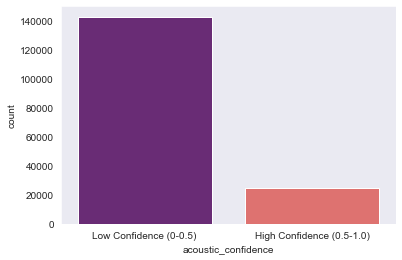

In [23]:
sns.countplot(x = 'acoustic_confidence',data = session_track_data,palette = 'magma')
plt.show()

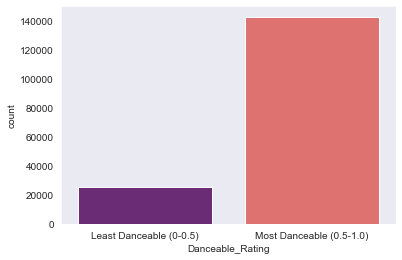

In [24]:
sns.countplot(x = 'Danceable_Rating',data = session_track_data,palette = 'magma')
plt.show()

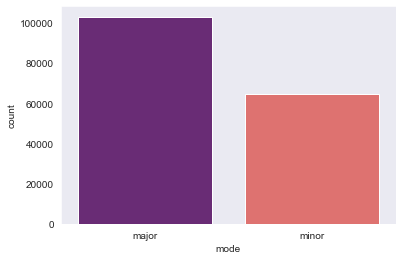

In [25]:
sns.set_style("dark")
sns.countplot(x = "mode",data = session_track_data,palette = 'magma')
plt.show()

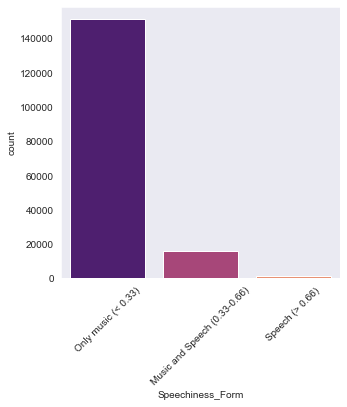

In [26]:
plt.figure(figsize = (5,5))
ax = sns.countplot(x = "Speechiness_Form",data = session_track_data,palette = 'magma')
plt.xticks(rotation = 45)
plt.show()

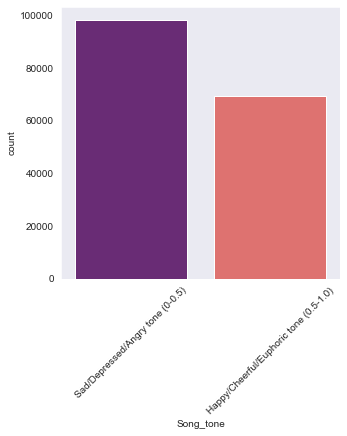

In [27]:
plt.figure(figsize = (5,5))
ax = sns.countplot(x = "Song_tone",data = session_track_data,palette = 'magma')
plt.xticks(rotation = 45)
plt.show()

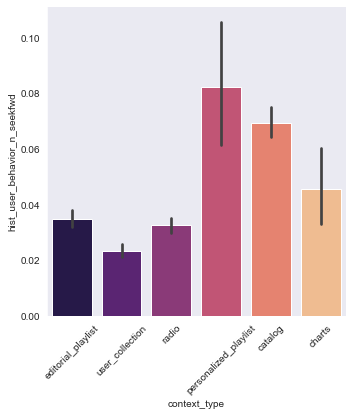

In [28]:
sns.catplot(x = 'context_type',y = 'hist_user_behavior_n_seekfwd',data = session_track_data,palette = 'magma',kind = 'bar')
plt.xticks(rotation 
           = 45)
plt.show()

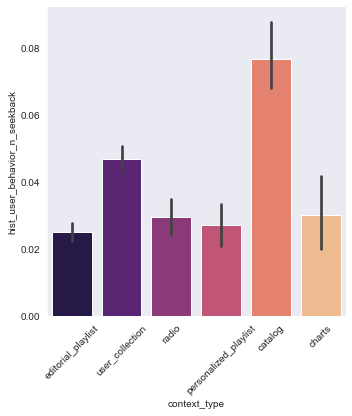

In [29]:
sns.catplot(x = 'context_type',y = 'hist_user_behavior_n_seekback',data = session_track_data,palette = 'magma',kind = 'bar')
plt.xticks(rotation = 45)
plt.show()

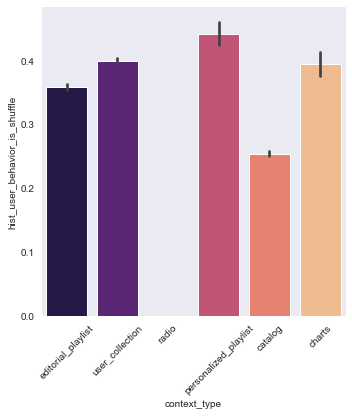

In [30]:
sns.catplot(x = 'context_type',y = 'hist_user_behavior_is_shuffle',data = session_track_data,palette = 'magma',kind = 'bar')
plt.xticks(rotation = 45)
plt.show()

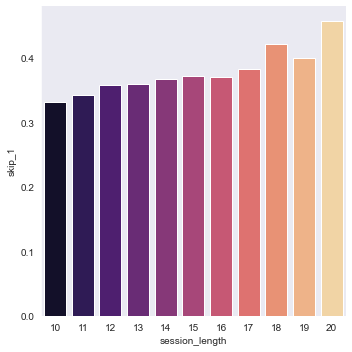

In [31]:
sns.catplot(x = 'session_length', y = 'skip_1',data = session_track_data,kind = 'bar',palette = 'magma',ci = None)
plt.show()

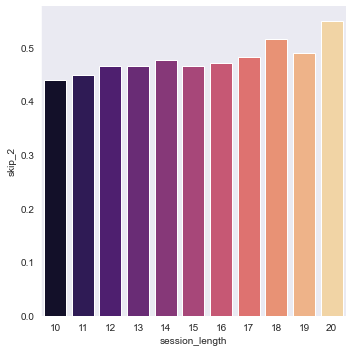

In [32]:
sns.catplot(x = 'session_length', y = 'skip_2',data = session_track_data,kind = 'bar',palette = 'magma',ci = None)
plt.show()

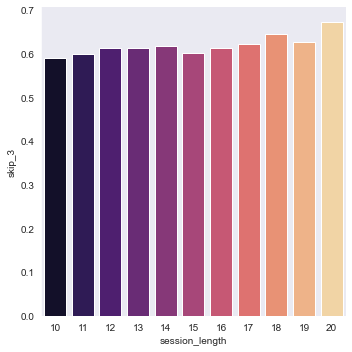

In [33]:
sns.catplot(x = 'session_length', y = 'skip_3',data = session_track_data,kind = 'bar',palette = 'magma',ci = None)
plt.show()

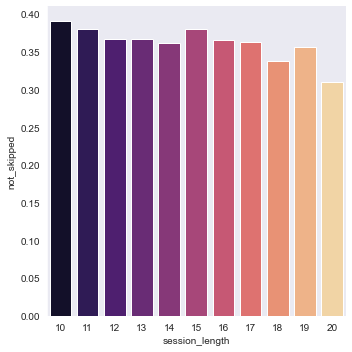

In [34]:
sns.catplot(x = 'session_length', y = 'not_skipped',data = session_track_data,kind = 'bar',palette = 'magma',ci = None)
plt.show()

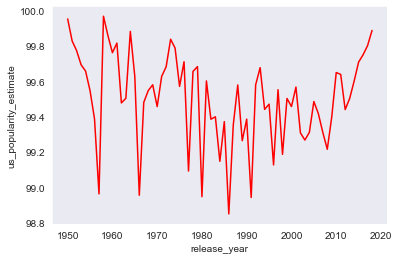

In [35]:
sns.lineplot(x = "release_year",y = "us_popularity_estimate",data = session_track_data,ci = None,color = 'r')
plt.show()

In [36]:
#Adding skip_1,skip_2 and skip_3
session_track_data['skipped'] = session_track_data['skip_1'] + session_track_data['skip_2'] + session_track_data['skip_3'] 
session_track_data

,session_id,session_position,session_length,skip_1,skip_2,skip_3,not_skipped,context_switch,no_pause_before_play,short_pause_before_play,long_pause_before_play,hist_user_behavior_n_seekfwd,hist_user_behavior_n_seekback,hist_user_behavior_is_shuffle,hour_of_day,date,premium,context_type,hist_user_behavior_reason_start,hist_user_behavior_reason_end,duration,release_year,us_popularity_estimate,acousticness,beat_strength,bounciness,danceability,dyn_range_mean,energy,flatness,instrumentalness,key,liveness,loudness,mechanism,mode,organism,speechiness,tempo,time_signature,valence,acoustic_vector_0,acoustic_vector_1,acoustic_vector_2,acoustic_vector_3,acoustic_vector_4,acoustic_vector_5,acoustic_vector_6,acoustic_vector_7,acoustic_confidence,Song_tone,Danceable_Rating,Speechiness_Form,skipped
0,0_00006f66-33e5-4de7-a324-2d18e439fc1e,1,20,False,False,False,True,0,0,0,0,0,0,True,16,2018-07-15,True,editorial_playlist,trackdone,trackdone,180.066666,2018,99.968133,0.015848,0.438551,0.473455,0.653119,7.660024,0.553465,1.035007,3.484468e-03,1,0.678553,-6.577,0.546784,major,0.320668,0.069717,134.024994,4,0.152255,-0.815775,0.386409,0.230160,0.028028,-0.333373,0.015452,-0.353590,0.205826,Low Confidence (0-0.5),Sad/Depressed/Angry tone (0-0.5),Most Danceable (0.5-1.0),Only music (< 0.33),False
1,0_00006f66-33e5-4de7-a324-2d18e439fc1e,2,20,False,False,False,True,0,1,0,0,0,0,True,16,2018-07-15,True,editorial_playlist,trackdone,trackdone,236.796371,2018,99.896728,0.061811,0.654804,0.735661,0.877393,11.308750,0.726828,1.025636,1.031315e-07,7,0.104322,-5.319,0.824766,minor,0.131391,0.061158,130.037994,4,0.337152,-0.713646,0.363718,0.310315,-0.042222,-0.383164,0.066357,-0.365308,0.157920,Low Confidence (0-0.5),Sad/Depressed/Angry tone (0-0.5),Most Danceable (0.5-1.0),Only music (< 0.33),False
2,0_00006f66-33e5-4de7-a324-2d18e439fc1e,3,20,False,False,False,True,0,1,0,0,0,0,True,16,2018-07-15,True,editorial_playlist,trackdone,trackdone,231.266663,2018,99.999976,0.354116,0.532155,0.540411,0.679719,8.065802,0.563009,1.029465,2.659035e-08,10,0.135776,-5.843,0.774327,major,0.296923,0.045354,145.028000,4,0.373862,-0.742541,0.375599,0.252660,-0.049007,-0.299745,0.063341,-0.486689,0.181604,Low Confidence (0-0.5),Sad/Depressed/Angry tone (0-0.5),Most Danceable (0.5-1.0),Only music (< 0.33),False
3,0_00006f66-33e5-4de7-a324-2d18e439fc1e,4,20,False,False,False,True,0,1,0,0,0,0,True,16,2018-07-15,True,editorial_playlist,trackdone,trackdone,169.826675,2018,99.995038,0.769225,0.641756,0.729224,0.864881,11.287586,0.529484,0.993520,6.598388e-06,1,0.103722,-7.756,0.630996,major,0.603271,0.229936,111.982002,4,0.649420,-0.705116,0.317562,0.289141,-0.038920,-0.393358,0.092719,-0.364418,0.285603,High Confidence (0.5-1.0),Happy/Cheerful/Euphoric tone (0.5-1.0),Most Danceable (0.5-1.0),Only music (< 0.33),False
4,0_00006f66-33e5-4de7-a324-2d18e439fc1e,5,20,False,False,False,True,0,1,0,0,0,0,True,16,2018-07-15,True,editorial_playlist,trackdone,trackdone,210.545258,2018,99.998498,0.006602,0.732428,0.794881,0.857778,12.181586,0.650057,1.000571,2.066649e-06,8,0.120842,-4.919,0.759465,major,0.170148,0.240980,147.031006,4,0.652921,-0.868489,0.331280,0.210478,0.084740,-0.333287,-0.025706,-0.510350,0.182315,Low Confidence (0-0.5),Happy/Cheerful/Euphoric tone (0.5-1.0),Most Danceable (0.5-1.0),Only music (< 0.33),False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167875,0_0eaeef5d-25e9-4429-bd55-af15d3604c9f,16,20,False,False,False,True,0,1,0,0,0,0,False,13,2018-07-15,True,user_collection,trackdone,trackdone,241.306671,2018,99.926393,0.100227,0.559790,0.571664,0.565336,8.411594,0.875369,0.981698,3.246980e-04,2,0.244097,-5.905,0.430147,minor,0.409132,0.045821,155.546005,4,0.891322,-0.530003,-0.020507,0.221878,0.232069,0.218059,0.086237,-0.181878,0.145040,Low Confidence (0-0.5),Happy/Cheerful/Euphoric tone (0.5-1

In [37]:
#Calculating average of skipping of tracks on each session length
session_skipped = session_track_data.groupby('session_length')['skipped'].mean()

In [38]:
#Calculating average of not skipping of tracks on each session length
session_not_skipped = session_track_data.groupby('session_length')['not_skipped'].mean()

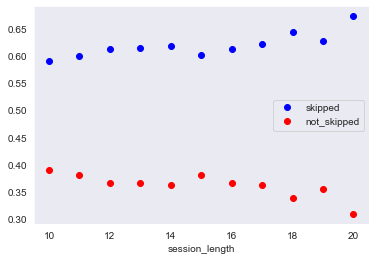

In [39]:
session_skipped.plot(marker = 'o',linestyle = 'None',color = 'b')
session_not_skipped.plot(marker = 'o',linestyle = 'None',color = 'r')
plt.legend(['skipped','not_skipped'],loc = 5)
plt.show()

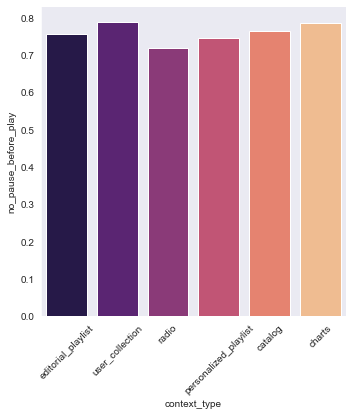

In [40]:
sns.catplot(x = 'context_type',y = 'no_pause_before_play',data = session_track_data,palette = 'magma',kind = 'bar',ci = None)
plt.xticks(rotation = 45)
plt.show()

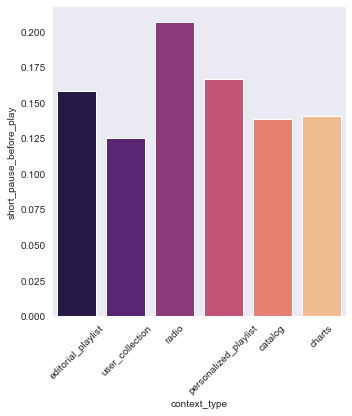

In [41]:
sns.catplot(x = 'context_type',y = 'short_pause_before_play',data = session_track_data,palette = 'magma',kind = 'bar',ci = None)
plt.xticks(rotation = 45)
plt.show()

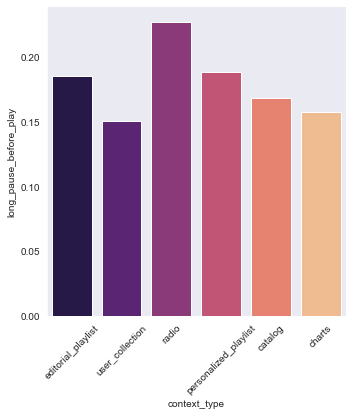

In [42]:
sns.catplot(x = 'context_type',y = 'long_pause_before_play',data = session_track_data,palette = 'magma',kind = 'bar',ci = None)
plt.xticks(rotation = 45)
plt.show()

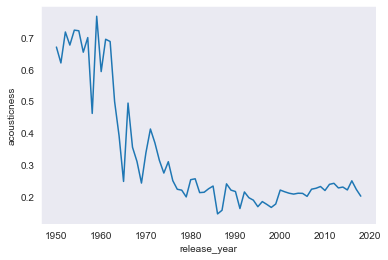

In [43]:
sns.lineplot(x = 'release_year',y = 'acousticness',data = session_track_data,ci = None)
plt.show()

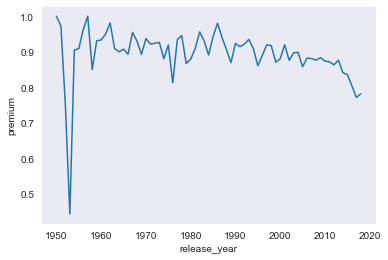

In [44]:
sns.lineplot(x = 'release_year',y = 'premium',data = session_track_data,ci = None)
plt.show()

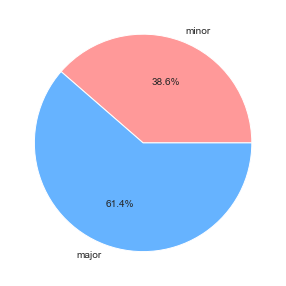

In [45]:
x = session_track_data['mode'].value_counts().sort_values()
colors = ['#ff9999','#66b3ff']
plt.figure(figsize=(5, 5))
ax = plt.pie(x = x, labels=['minor', 'major'], autopct = "%1.1f%%",colors = colors)
plt.show()

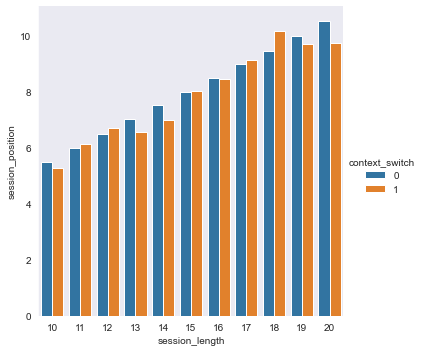

In [46]:
sns.catplot(x = 'session_length',y = 'session_position', hue  = 'context_switch',data = session_track_data,kind = 'bar',ci = None)
plt.show()

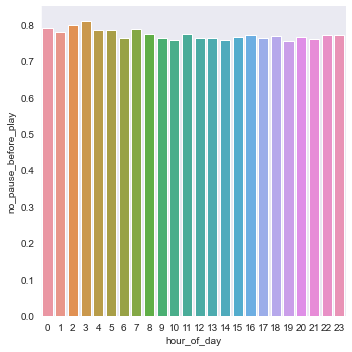

In [47]:
sns.catplot(x = 'hour_of_day', y = 'no_pause_before_play',data = session_track_data,kind = 'bar',ci = None)
plt.show()

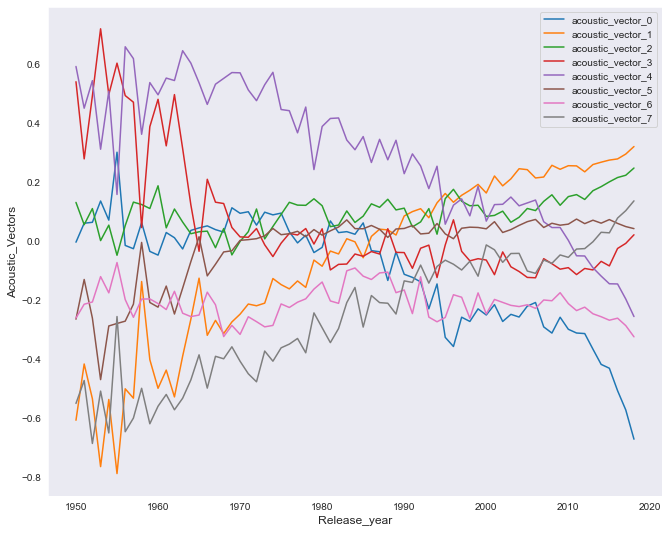

In [48]:
plt.figure(figsize=(11, 9))
ac_vc = ['acoustic_vector_0','acoustic_vector_1','acoustic_vector_2','acoustic_vector_3','acoustic_vector_4','acoustic_vector_5','acoustic_vector_6','acoustic_vector_7']

for x in ac_vc:
    ax = sns.lineplot(x = "release_year", y = x,label = x,data = session_track_data,ci = None)
    
    
ax.set_ylabel('Acoustic_Vectors',fontsize = 12)
ax.set_xlabel('Release_year',fontsize = 12)
plt.show()

In [49]:
date_session_length = session_track_data.groupby('date')['session_length'].mean()
date_session_length

date
2018-05-12    20.000000
2018-05-18    18.000000
2018-06-05    20.000000
2018-06-19    20.000000
2018-06-29    20.000000
2018-06-30    20.000000
2018-07-04    13.000000
2018-07-05    18.153846
2018-07-06    20.000000
2018-07-07    18.058824
2018-07-09    20.000000
2018-07-10    18.680556
2018-07-11    16.894118
2018-07-12    18.320000
2018-07-13    18.423892
2018-07-14    17.856944
2018-07-15    17.564632
2018-07-16    13.000000
Name: session_length, dtype: float64

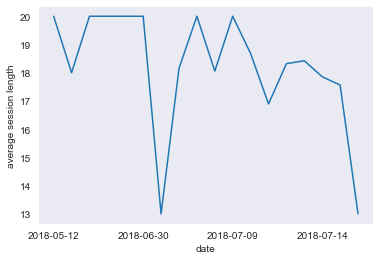

In [50]:
date_session_length.plot()
plt.ylabel('average session length')
plt.show()

# Feature Engineering

In [64]:
session_track_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 167880 entries, 0 to 167879
Data columns (total 54 columns):
 #   Column                           Non-Null Count   Dtype   
---  ------                           --------------   -----   
 0   session_id                       167880 non-null  object  
 1   session_position                 167880 non-null  int64   
 2   session_length                   167880 non-null  int64   
 3   skip_1                           167880 non-null  bool    
 4   skip_2                           167880 non-null  bool    
 5   skip_3                           167880 non-null  bool    
 6   not_skipped                      167880 non-null  bool    
 7   context_switch                   167880 non-null  int64   
 8   no_pause_before_play             167880 non-null  int64   
 9   short_pause_before_play          167880 non-null  int64   
 10  long_pause_before_play           167880 non-null  int64   
 11  hist_user_behavior_n_seekfwd     167880 non-null  in

In [65]:
session_track_data_copy = session_track_data.copy()

In [66]:
#Dropping columns
session_track_data_copy.drop(['skip_1','skip_2','skip_3','acoustic_confidence','Song_tone','Danceable_Rating','Speechiness_Form'],inplace = True,axis = 1)

In [67]:
session_track_data_copy.columns

Index(['session_id', 'session_position', 'session_length', 'not_skipped',
       'context_switch', 'no_pause_before_play', 'short_pause_before_play',
       'long_pause_before_play', 'hist_user_behavior_n_seekfwd',
       'hist_user_behavior_n_seekback', 'hist_user_behavior_is_shuffle',
       'hour_of_day', 'date', 'premium', 'context_type',
       'hist_user_behavior_reason_start', 'hist_user_behavior_reason_end',
       'duration', 'release_year', 'us_popularity_estimate', 'acousticness',
       'beat_strength', 'bounciness', 'danceability', 'dyn_range_mean',
       'energy', 'flatness', 'instrumentalness', 'key', 'liveness', 'loudness',
       'mechanism', 'mode', 'organism', 'speechiness', 'tempo',
       'time_signature', 'valence', 'acoustic_vector_0', 'acoustic_vector_1',
       'acoustic_vector_2', 'acoustic_vector_3', 'acoustic_vector_4',
       'acoustic_vector_5', 'acoustic_vector_6', 'acoustic_vector_7',
       'skipped'],
      dtype='object')

In [68]:
#Fetching those columns which have object dtype, so that we can encode it.
s = (session_track_data_copy.dtypes == 'object')
object_cols = list(s[s].index)

print("Object variables in the dataset:", object_cols)

Object variables in the dataset: ['session_id', 'date', 'context_type', 'hist_user_behavior_reason_start', 'hist_user_behavior_reason_end', 'mode']


In [69]:
#Encoding the object dtype columns
LE=LabelEncoder()
for i in object_cols:
    session_track_data_copy[i]= session_track_data_copy[[i]].apply(LE.fit_transform)

In [70]:
#Fetching those columns which have bool dtype, so that we can encode it.
bool_col = (session_track_data_copy.dtypes == 'bool')
cols = list(bool_col[bool_col].index)

print("Bool variables in the dataset:", cols)

Bool variables in the dataset: ['not_skipped', 'hist_user_behavior_is_shuffle', 'premium', 'skipped']


In [71]:
#Encoding the bool dtype columns
for i in cols:
    session_track_data_copy[i] = session_track_data_copy[i].astype(int)

In [72]:
x = session_track_data_copy.drop(['skipped'],axis = 1)
y = session_track_data_copy[['skipped']]

In [73]:
x

,session_id,session_position,session_length,not_skipped,context_switch,no_pause_before_play,short_pause_before_play,long_pause_before_play,hist_user_behavior_n_seekfwd,hist_user_behavior_n_seekback,hist_user_behavior_is_shuffle,hour_of_day,date,premium,context_type,hist_user_behavior_reason_start,hist_user_behavior_reason_end,duration,release_year,us_popularity_estimate,acousticness,beat_strength,bounciness,danceability,dyn_range_mean,energy,flatness,instrumentalness,key,liveness,loudness,mechanism,mode,organism,speechiness,tempo,time_signature,valence,acoustic_vector_0,acoustic_vector_1,acoustic_vector_2,acoustic_vector_3,acoustic_vector_4,acoustic_vector_5,acoustic_vector_6,acoustic_vector_7
0,0,1,20,1,0,0,0,0,0,0,1,16,16,1,2,7,6,180.066666,2018,99.968133,0.015848,0.438551,0.473455,0.653119,7.660024,0.553465,1.035007,3.484468e-03,1,0.678553,-6.577,0.546784,0,0.320668,0.069717,134.024994,4,0.152255,-0.815775,0.386409,0.230160,0.028028,-0.333373,0.015452,-0.353590,0.205826
1,0,2,20,1,0,1,0,0,0,0,1,16,16,1,2,7,6,236.796371,2018,99.896728,0.061811,0.654804,0.735661,0.877393,11.308750,0.726828,1.025636,1.031315e-07,7,0.104322,-5.319,0.824766,1,0.131391,0.061158,130.037994,4,0.337152,-0.713646,0.363718,0.310315,-0.042222,-0.383164,0.066357,-0.365308,0.157920
2,0,3,20,1,0,1,0,0,0,0,1,16,16,1,2,7,6,231.266663,2018,99.999976,0.354116,0.532155,0.540411,0.679719,8.065802,0.563009,1.029465,2.659035e-08,10,0.135776,-5.843,0.774327,0,0.296923,0.045354,145.028000,4,0.373862,-0.742541,0.375599,0.252660,-0.049007,-0.299745,0.063341,-0.486689,0.181604
3,0,4,20,1,0,1,0,0,0,0,1,16,16,1,2,7,6,169.826675,2018,99.995038,0.769225,0.641756,0.729224,0.864881,11.287586,0.529484,0.993520,6.598388e-06,1,0.103722,-7.756,0.630996,0,0.603271,0.229936,111.982002,4,0.649420,-0.705116,0.317562,0.289141,-0.038920,-0.393358,0.092719,-0.364418,0.285603
4,0,5,20,1,0,1,0,0,0,0,1,16,16,1,2,7,6,210.545258,2018,99.998498,0.006602,0.732428,0.794881,0.857778,12.181586,0.650057,1.000571,2.066649e-06,8,0.120842,-4.919,0.759465,0,0.170148,0.240980,147.031006,4,0.652921,-0.868489,0.331280,0.210478,0.084740,-0.333287,-0.025706,-0.510350,0.182315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167875,9999,16,20,1,0,1,0,0,0,0,0,13,16,1,5,7,6,241.306671,2018,99.926393,0.100227,0.559790,0.571664,0.565336,8.411594,0.875369,0.981698,3.246980e-04,2,0.244097,-5.905,0.430147,1,0.409132,0.045821,155.546005,4,0.891322,-0.530003,-0.020507,0.221878,0.232069,0.218059,0.086237,-0.181878,0.145040
167876,9999,17,20,1,0,1,0,0,0,0,0,13,16,1,5,7,6,212.533325,2018,99.905106,0.247189,0.601121,0.632665,0.703095,9.269985,0.529001,1.025182,6.178943e-08,1,0.322316,-7.339,0.438776,1,0.433633,0.036520,134.427002,4,0.701824,-0.472023,-0.011628,0.234998,0.169529,0.321254,0.105851,-0.215453,-0.013233
167877,9999,18,20,1,0,1,0,0,0,0,0,13,16,1,5,7,6,204.293335,2018,99.915604,0.298400,0.706898,0.730013,0.791413,10.419632,0.951893,0.940008,4.260943e-04,1,0.274913,-4.703,0.896789,0,0.223266,0.094902,153.979996,4,0.961417,-0.628608,0.052259,0.219314,0.238612,0.032383,0.072873,-0.129108,0.214087
167878,9999,19,20,1,0,1,0,0,0,0,0,13,16,1,5,7,6,193.773331,2018,99.882031,0.038110,0.492183,0.499016,0.645011,7.658142,0.871987,0.983273,4.341016e-03,4,0.047525,-4.200,0.627530,1,0.264751,0.075430,87.466003,4,0.743112,-0.675257,0.102726,0.123573,0.136240,-0.222776,-0.034961,-0.478699,0.197820


In [74]:
y

,skipped
0,0
1,0
2,0
3,0
4,0
...,...
167875,0
167876,0
167877,0
167878,0


In [75]:
from sklearn.ensemble import ExtraTreesClassifier

In [76]:
#This classifier picks those features which high affects the dependent feature which is our "skipped"
model = ExtraTreesClassifier()
model.fit(x,y)
print(model.feature_importances_)

[0.00366829 0.00385234 0.00304342 0.56079481 0.00111212 0.00317784
 0.00621281 0.00348668 0.0018411  0.00127402 0.00117713 0.00337488
 0.00148243 0.00112869 0.00263071 0.03736353 0.316468   0.00190645
 0.00178921 0.00159383 0.00178341 0.00167402 0.00167079 0.00166109
 0.00162727 0.00170473 0.00171168 0.00156787 0.00171009 0.00179786
 0.00174072 0.00170027 0.00090335 0.00168408 0.00178053 0.00179192
 0.00056901 0.00179496 0.00175448 0.00170615 0.00168976 0.00170413
 0.00174089 0.00169469 0.00169453 0.0017634 ]


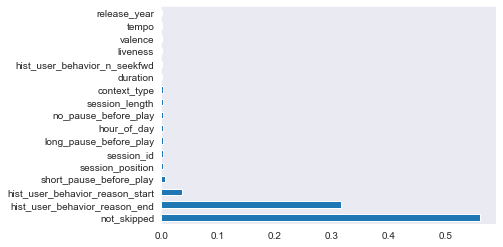

In [77]:
#Now we plot the model, as we can see "hist_user_behavior_reason_start", "hist_user_behavior_reason_end" and "not_skipped" are very important.
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(17).plot(kind='barh')
plt.show()

In [81]:
corr = session_track_data_copy.corr()

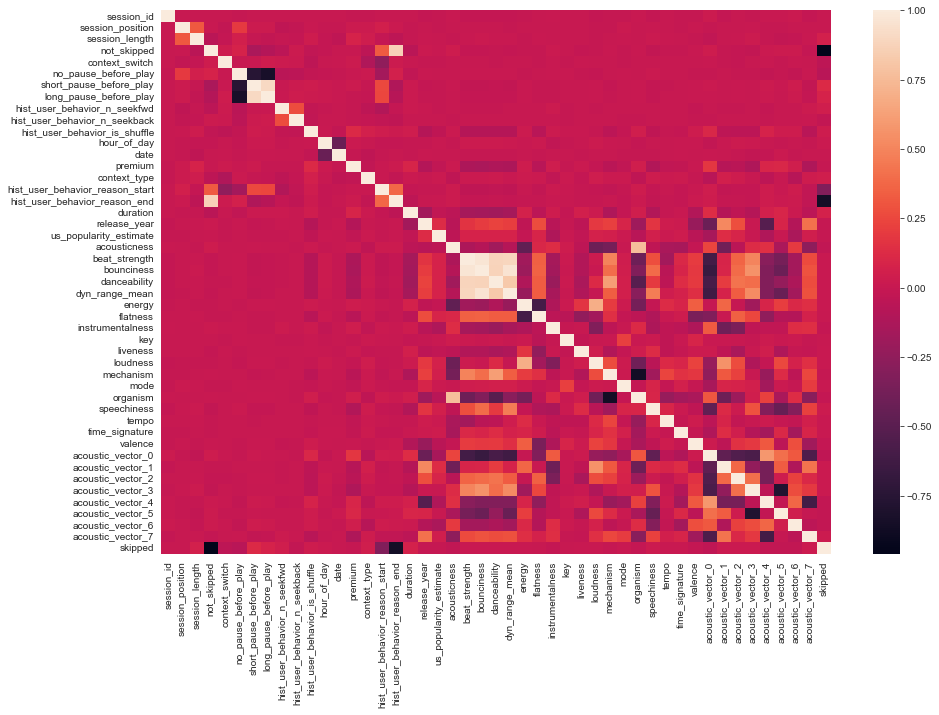

In [86]:
#Plotting the heamap
plt.figure(figsize = (15,10))
sns.heatmap(corr)
plt.show()